# **King County House Sales Prediction**

#### King County is a county located in the U.S. state of Washington. The population was 2,233,163 in the 2018 census estimate. King is the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, which is the state's largest city.

#### **Fact :-** King is the highest-income Washington location by per capita income ($38,211).

## Import Libraries

In [0]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

## Data Acquistion
Collecting required data

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Pranjulcr7/King-County-House-Sales-Prediction/master/kc_house_data.csv")

## Data Exploration/Analysis
The aim of this section is to identify any potential issues with the features and decide on how to
    handle those issues. The primary concern is with outliers and unexpected distributions, though we
    might potentially encounter issues such as unexpected scales.

### Dataset Description 
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

1. **id -** a notation for a house
2. **date -** Date house was sold
2. **price -** Price is prediction target
2. **bedrooms -** Number of Bedrooms/House
2. **bathrooms -** Number of bathrooms/House
2. **sqft_living -** square footage of the home
2. **sqft_lot -** square footage of the lot
2. **floors -** Total floors (levels) in house
2. **waterfront -** House which has a view to a waterfront
2. **view -** Has been viewed
2. **condition -** How good the condition is ( Overall )
2. **grade -** overall grade given to the housing unit, based on King County grading system
2. **sqft_above -** square footage of house apart from basement
2. **sqft_basement -** square footage of the basement
2. **yr_built -** Built Year
2. **yr_renovated -** Year when house was renovated
2. **zipcode -** zip
2. **lat -** Latitude coordinate
2. **long -** Longitude coordinate
2. **sqft_living15 -** Living room area in 2015(implies-- some renovations) 
2. **sqft_lot15 -** lotSize area in 2015(implies-- some renovations)

In [332]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Dimensions of dataset 

19 house features plus the price and the id columns, along with 21613 observations.

In [333]:
df.shape

(21613, 21)

### Basic statistics of dataset

-  In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower [2] and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower

In [334]:
df.drop(['id','lat','long','zipcode'],axis=1).describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
unique,372,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,20140623T000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,142,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,1986.55,12768.46
std,NaN,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,685.39,27304.18
min,NaN,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,399.00,651.00
25%,NaN,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,1490.00,5100.00
50%,NaN,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,1840.00,7620.00
75%,NaN,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,2360.00,10083.00


### Finding the data quality
-  no missing values in dataset
-  1 object, 5 float and 15 int datatypes present, each having 21613 entries.

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


##Univariate Analysis
 Summary statistics for each field in the data set.

##Price
The first part of the data we examine is the Price, which is the target in our study.


### Description of price 

In [336]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df['price'].describe()

count     21613.0
mean     540088.1
std      367127.2
min       75000.0
25%      321950.0
50%      450000.0
75%      645000.0
max     7700000.0
Name: price, dtype: float64

### Distribution of price

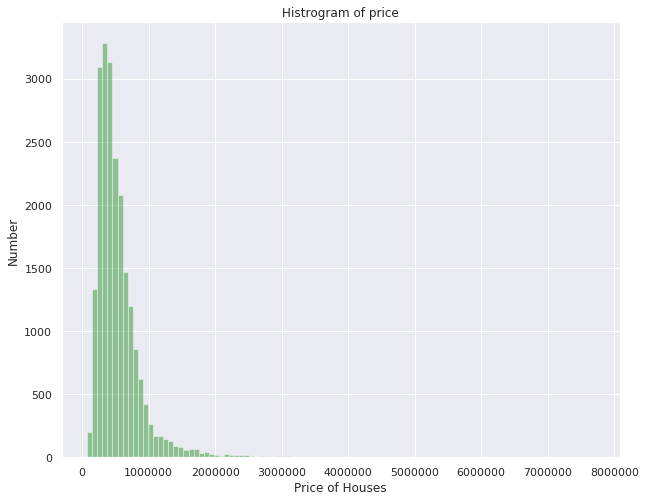

In [337]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot( df['price'], kde=False, bins=100, color='green')
plt.title('Histrogram of price')
plt.xlabel("Price of Houses")
plt.ylabel("Number")
plt.show()



### use np.log() to transform price and calculate the skewness a second time, as well as re-plot the data

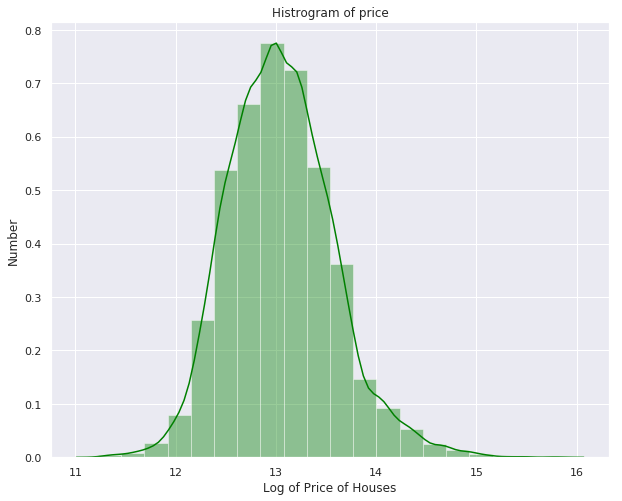

In [338]:
target = np.log(df['price'])
sns.distplot(target, kde=True, bins=20, color='green')
plt.title('Histrogram of price')
plt.xlabel("Log of Price of Houses")
plt.ylabel("Number")
plt.grid(True)
plt.show()

The histogram shows a normal distribution with a long tail, which is exactly what we would expect
for data of this kind.

### Boxplot of Price

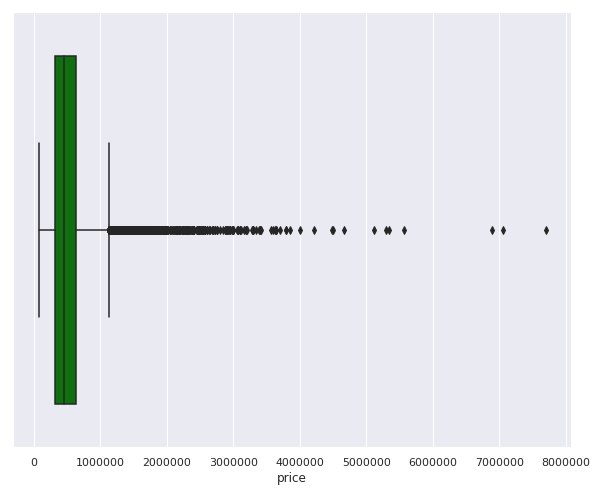

In [339]:
sns.boxplot( df['price'], color='green' );

## Bedrooms
  Number of Bedrooms/House


### Description of bedrooms


In [340]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['bedrooms'].describe()

count   21613.00
mean        3.37
std         0.93
min         0.00
25%         3.00
50%         3.00
75%         4.00
max        33.00
Name: bedrooms, dtype: float64

In the bedrooms data, there is an anomaly. The median number of bedrooms is just 3 but there is
one entry with 33 bedrooms.

### Checking anomaly found

In [341]:
df.query('bedrooms==33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.00,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


 Although such houses do exist, the price of this house is only $640,000,
it has only 1.75 bathrooms and is on a single floor. This suggests that the property does not actually
have 33 bedrooms at all. Most likely, the house has 3 bedrooms and the 33 is a data entry error.
However, without knowing this for sure, the safer option is to exclude that entry from future
analysis.

#### Removing anomaly

In [0]:
df = df.drop([15870])

### Distribution of bedrooms

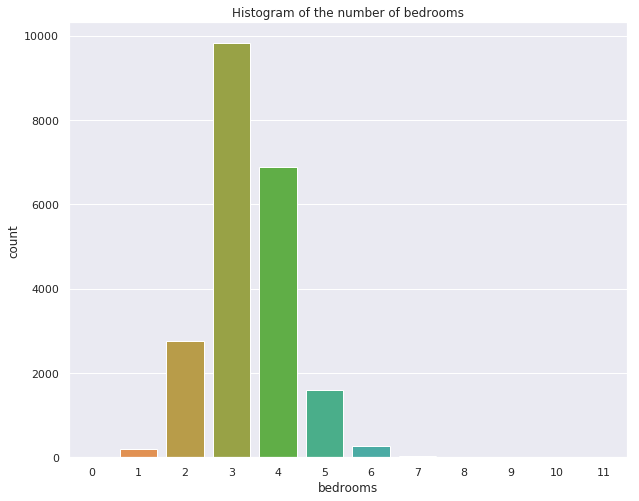

In [343]:
sns.countplot( df['bedrooms']);
plt.title('Histogram of the number of bedrooms')
plt.show()

The histogram shows a normal distribution with a long tail, it can be noticed average number of rooms is three which is common.


## Bathrooms
Number of Bathrooms/House


### Description of bedrooms
   Values are decimal and calculated as:
-  Full bathrooms (ensuite) = 1
-  Half bathrooms (separate )= 0.5
-  Powder rooms (only toilet and sink) = 0.25

In [344]:
df['bathrooms'].describe()

count   21612.00
mean        2.11
std         0.77
min         0.00
25%         1.75
50%         2.25
75%         2.50
max         8.00
Name: bathrooms, dtype: float64

### Distribution of bathrooms

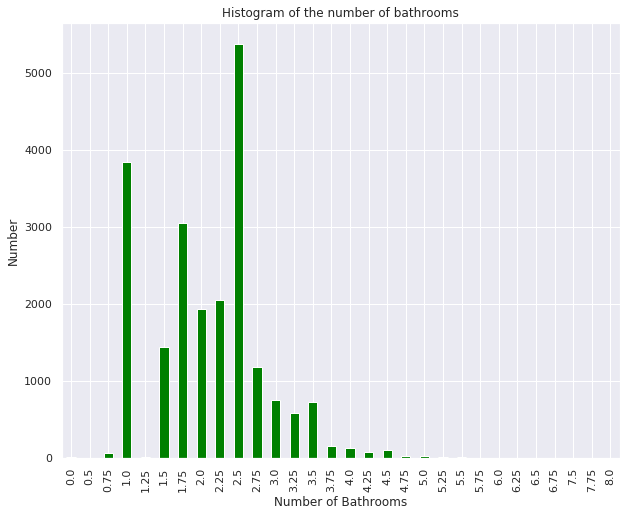

In [345]:
df['bathrooms'].value_counts().sort_index().plot.bar(color='green');
plt.title('Histogram of the number of bathrooms')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Number")
plt.show()

The median number of bathrooms is 2.25 and the mean is 2.1 which is consistent with a more or less
normal distribution as seen in Figure 


## Sqft_living 

square footage of the home


### Description of Sqft_living



In [346]:
df['sqft_living'].describe()

count   21612.00
mean     2079.92
std       918.46
min       290.00
25%      1426.50
50%      1910.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

The sqft_living feature gives the total area of the living space of the house in square feet. The
median is 1,910 square feet and the largest property has an area of 13,540 square feet. 

### Distribution of sqft_living

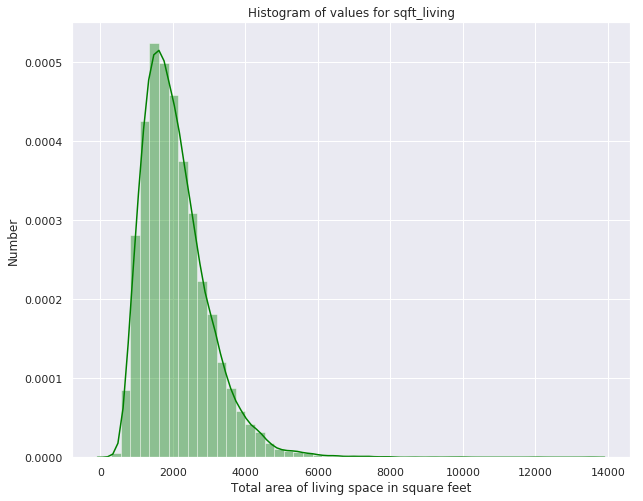

In [347]:
sns.distplot(df['sqft_living'], hist=True, color='green');
plt.title('Histogram of values for sqft_living')
plt.xlabel("Total area of living space in square feet")
plt.ylabel("Number")
plt.show()

 Above shows the histogram of values which is a normal distribution with a long tail, as we might
expect.


## Sqft_lot
The feature of sqft_lot gives the total area of the plot which includes the garden and grounds of
a property. 


### Description of sqft_lot

In [348]:
df['sqft_lot'].describe()

count     21612.00
mean      15107.39
std       41421.42
min         520.00
25%        5040.00
50%        7619.00
75%       10688.25
max     1651359.00
Name: sqft_lot, dtype: float64

The median value is 7,619 square feet and the mean is 15,107.4 square feet. 

### Distribution of sqft_lot

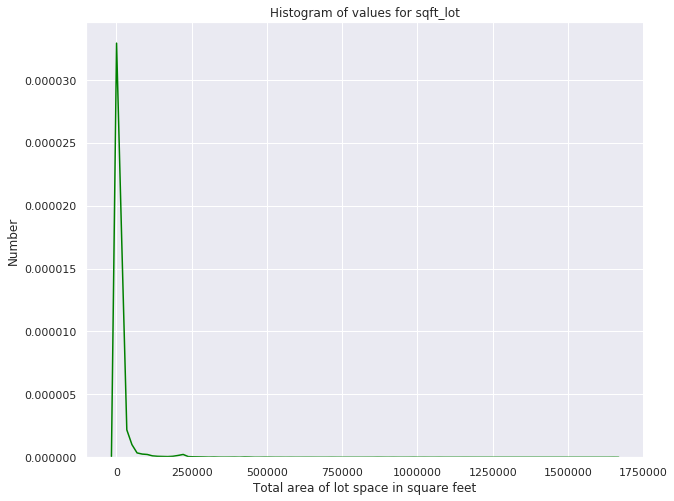

In [349]:
sns.distplot(df['sqft_lot'], hist=False, color='green', bins=100);
plt.title('Histogram of values for sqft_lot')
plt.xlabel("Total area of lot space in square feet")
plt.ylabel("Number")
plt.show()

Unlike the total area of the living space, the area of the plot is extremely heavily skewed. 


## Floors
Total floors (levels) in house.
The number of floors in properties can be half values (e.g. 1.5, 2.5 etc) which is most likely because
of Mezzanine floors.

### Description of floors

In [350]:
df['floors'].describe()

count   21612.00
mean        1.49
std         0.54
min         1.00
25%         1.00
50%         1.50
75%         2.00
max         3.50
Name: floors, dtype: float64

The median value is 1.5 square feet and the mean is 1.5 square feet.

### Distribution of floors

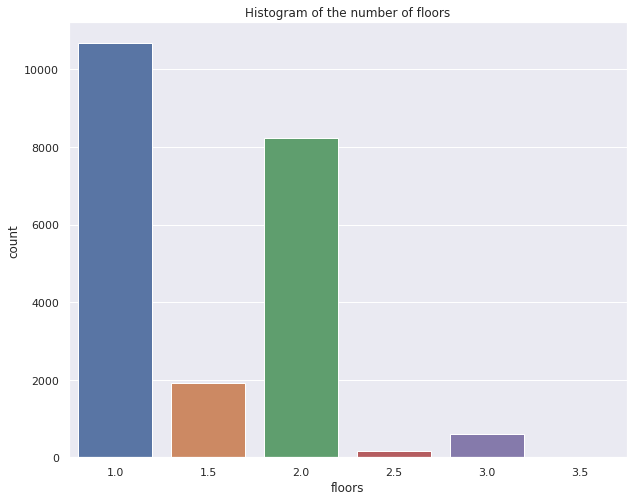

In [351]:
sns.countplot( df['floors']);
plt.title('Histogram of the number of floors')
plt.show()

 10,679 of the properties are on a single floor,
8,241 on two floors and 1,910 on 1 and a half floors

## waterfront 
House which has a view to a waterfront.<br/>

According to the U.S. Census Bureau, the county has a total area of 2,307 square miles (5,980 km2), of which 2,116 square miles (5,480 km2) is land and 191 square miles (490 km2) (8.3%) is water.


### Description of water front

In [352]:
df['waterfront'].describe()

count   21612.00
mean        0.01
std         0.09
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: waterfront, dtype: float64

 The waterfront feature is 0 if
the property does not have a waterfront view and 1 if it does. 

### Distribution of water front

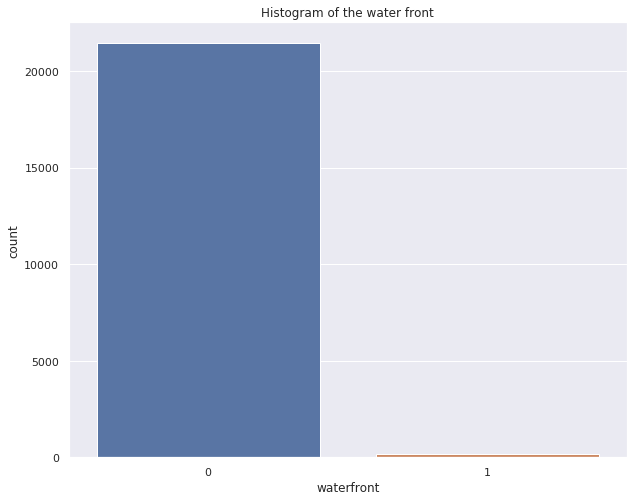

In [353]:
sns.countplot( df['waterfront']);
plt.title('Histogram of the water front')
plt.show()

In the dataset we have 21,449 houses
do not have a waterfront view and only 163 do. This suggests that this feature will not be very
helpful in the general case.

##view

It is unclear what this feature indicates because one source suggests it is whether the property has
been viewed  and another suggests it is a measure of the quality of the view from the property.

### Description of view

In [354]:
df['view'].describe()

count   21612.00
mean        0.23
std         0.77
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: view, dtype: float64



### Distribution of view

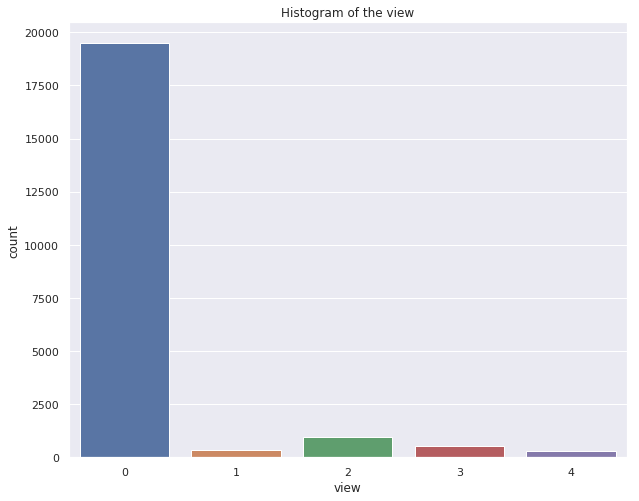

In [355]:
sns.countplot( df['view']);
plt.title('Histogram of the view')
plt.show()

It has
values 0 to 4 but the vast majority (90.2%) of houses have a value of 0. Therefore, since the meaning
of the feature is unclear and it has little differentiating power, it will be ignored in future analysis
and prediction.

## Condition 
How good the condition is ( Overall )

The features condition and grade are assigned by the King County authorities and their definitions
can be found on the King County website

### Description of condition

In [356]:
df['condition'].describe()

count   21612.00
mean        3.41
std         0.65
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: condition, dtype: float64

The median value is 3.41 square feet and the mean is 3.0 square feet.

### Number of properties with different condition

In [357]:
df.groupby('condition').size()

condition
1       30
2      172
3    14031
4     5679
5     1700
dtype: int64

Condition has values between 1 and 5, where 1 indicates a worn-out property and 5 indicates a
very good condition

### Distribution of condition

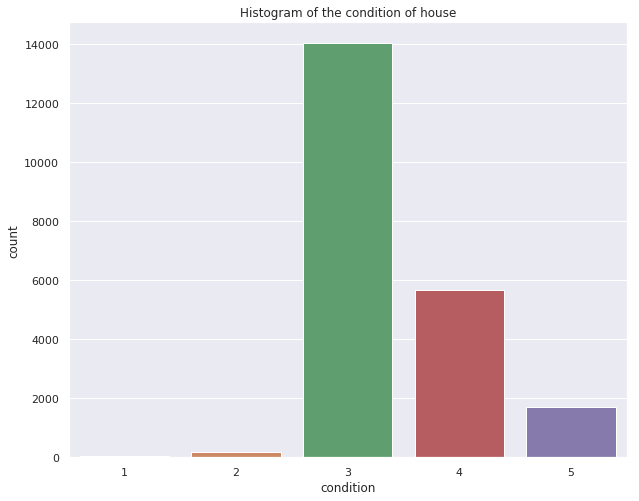

In [358]:
sns.countplot(df['condition']);
plt.title('Histogram of the condition of house')
plt.show()

It can be observed mostly properties are rated three plus for condition.

##Grade 
overall grade given to the housing unit, based on King County grading system



### Description of grade

In [359]:
df['grade'].describe()

count   21612.00
mean        7.66
std         1.18
min         1.00
25%         7.00
50%         7.00
75%         8.00
max        13.00
Name: grade, dtype: float64

The median value is 7.0 square feet and the mean is 7.66 square feet.

### Number of properties with different grade

In [360]:
df.groupby('grade').size()

grade
1        1
3        3
4       29
5      242
6     2038
7     8980
8     6068
9     2615
10    1134
11     399
12      90
13      13
dtype: int64

Grade is “Building Grade” which “represents the construction quality of
improvements. Grades run from grade 1 to 13.”

### Distribution of grade

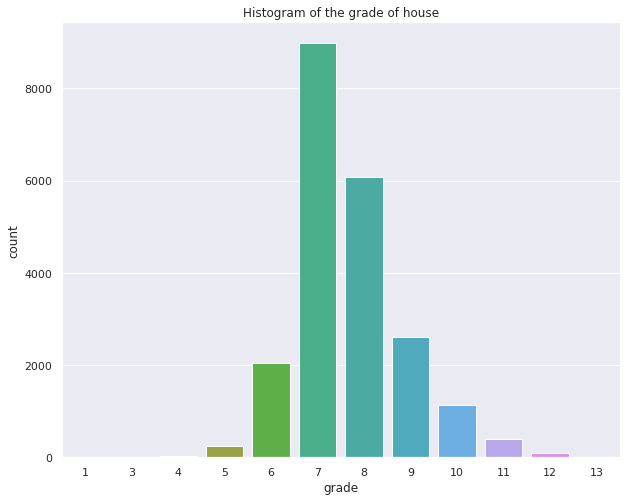

In [361]:
sns.countplot(df['grade']);
plt.title('Histogram of the grade of house')
plt.show()

It can be observed mostly properties are rated seven - eight grade.

## Sqft_above

square footage of house apart from basement



### Description of sqft_above

In [362]:
df['sqft_above'].describe()

count   21612.00
mean     1788.43
std       828.09
min       290.00
25%      1190.00
50%      1560.00
75%      2210.00
max      9410.00
Name: sqft_above, dtype: float64

The median value is 1560 square feet and the mean is 1788.43 square feet.

### Distribution of sqft_above

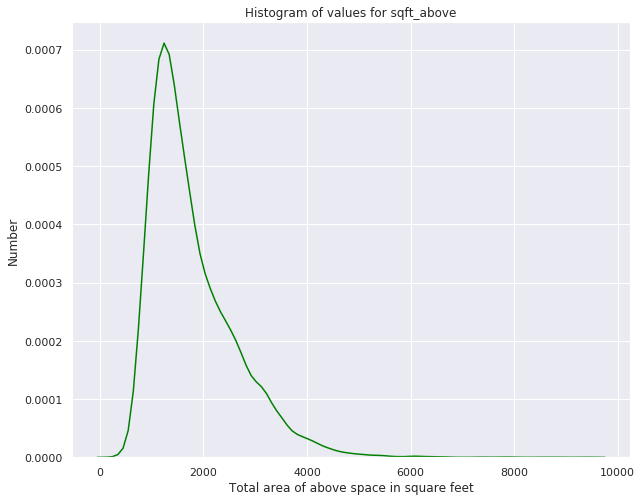

In [363]:
sns.distplot(df['sqft_above'], hist=False, color='green');
plt.title('Histogram of values for sqft_above')
plt.xlabel("Total area of above space in square feet")
plt.ylabel("Number")
plt.show()

Unlike the total area of the living space, the area of the plot is extremely heavily skewed. 


## sqft_basement 
square footage of the basement

### Description of sqft_basement 

In [364]:
df['sqft_basement'].describe()

count   21612.00
mean      291.50
std       442.58
min         0.00
25%         0.00
50%         0.00
75%       560.00
max      4820.00
Name: sqft_basement, dtype: float64

The median value is 0 square feet and the mean is 291.5 square feet.

### Distribution of sqft_basement

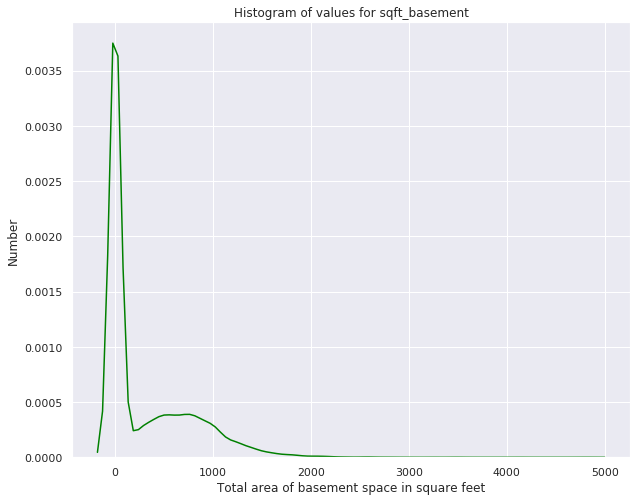

In [365]:
sns.distplot(df['sqft_basement'], hist=False, color='green');
plt.title('Histogram of values for sqft_basement')
plt.xlabel("Total area of basement space in square feet")
plt.ylabel("Number")
plt.show()

 As the distribution shows, the
majority of properties have no basement and indeed the median value is 0.

## yr_built 
Built Year

### Description of yr_built

In [366]:
df['yr_built'].describe()

count   21612.00
mean     1971.01
std        29.37
min      1900.00
25%      1951.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64

This feature gives the year the property was built in. There are no missing values and all properties
were built between 1900 and 2015.

### Distribution of yr_built

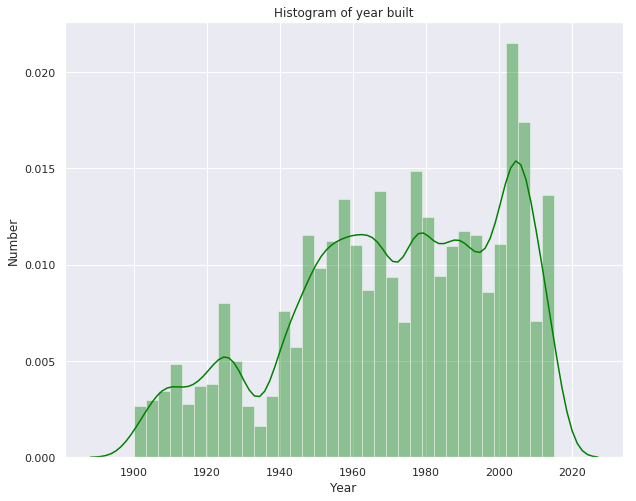

In [367]:
sns.distplot(df['yr_built'], hist=True, color='green');
plt.title('Histogram of year built')
plt.xlabel("Year")
plt.ylabel("Number")
plt.show()

However, it likely follows the distribution of general
house building, hence we see a significant drop in the late 1930s and a spike in the early 2000s.

##yr_renovated 
This feature records the most recent year of renovation to the property.

### Description of yr_renovated

In [368]:
df['yr_renovated'].describe()

count   21612.00
mean       84.41
std       401.69
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2015.00
Name: yr_renovated, dtype: float64

The median value is 0  and the mean is 84.41.

### Distribution of yr_renovated

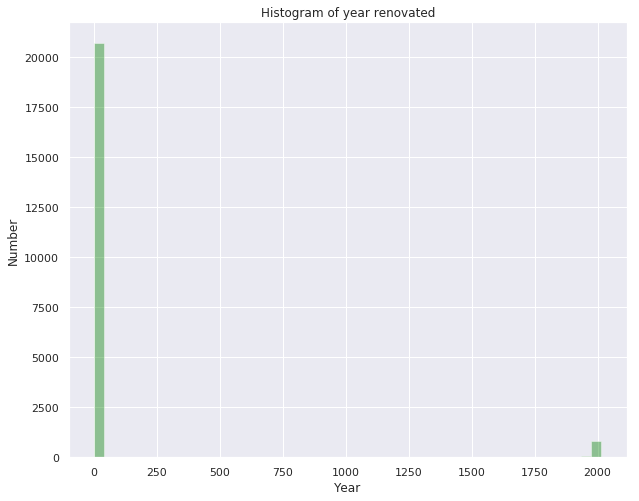

In [369]:
sns.distplot(df['yr_renovated'], kde=False, hist=True, color='green');
plt.title('Histogram of year renovated')
plt.xlabel("Year")
plt.ylabel("Number")
plt.show()

95.8% of all
properties have a 0 for this feature indicating that they have never been renovated.

## sqft_living15 
Living room area in 2015(implies-- some renovations)

### Description of sqft_living15 

In [370]:
df['sqft_living15'].describe()

count   21612.00
mean     1986.58
std       685.39
min       399.00
25%      1490.00
50%      1840.00
75%      2360.00
max      6210.00
Name: sqft_living15, dtype: float64

The median value is 1840 square feet and the mean is 1986.58 square feet.

### Distribution of sqft_living15

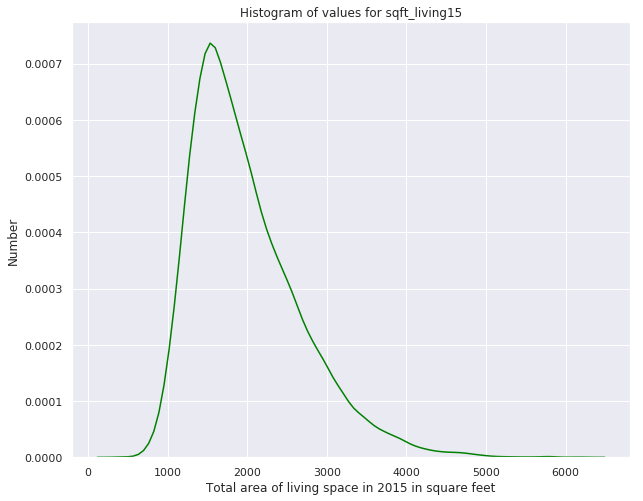

In [371]:
sns.distplot(df['sqft_living15'], hist=False, color='green');
plt.title('Histogram of values for sqft_living15')
plt.xlabel("Total area of living space in 2015 in square feet")
plt.ylabel("Number")
plt.show()

The area of the plot is slighlty skewed. 


## sqft_lot15
Lot size area in 2015(implies-- some renovations)

### Description of sqft_lot15 

In [372]:
df['sqft_lot15'].describe()

count    21612.00
mean     12768.83
std      27304.76
min        651.00
25%       5100.00
50%       7620.00
75%      10083.25
max     871200.00
Name: sqft_lot15, dtype: float64

The median value is 7620 square feet and the mean is 12768.83 square feet.

### Distribution of sqft_lot15

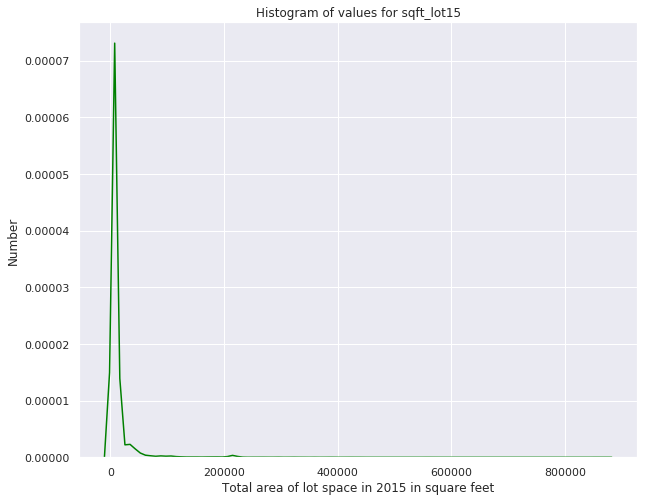

In [373]:
sns.distplot(df['sqft_lot15'], hist=False, color='green');
plt.title('Histogram of values for sqft_lot15')
plt.xlabel("Total area of lot space in 2015 in square feet")
plt.ylabel("Number")
plt.show()

Unlike the total area of the living space, in 2015 the area of the plot is extremely heavily skewed. 

##Bivariate Analysis
 The simultaneous analysis of two variables (attributes).
 
 
 ### Pairplots
 Plot pairwise relationships in a dataset.

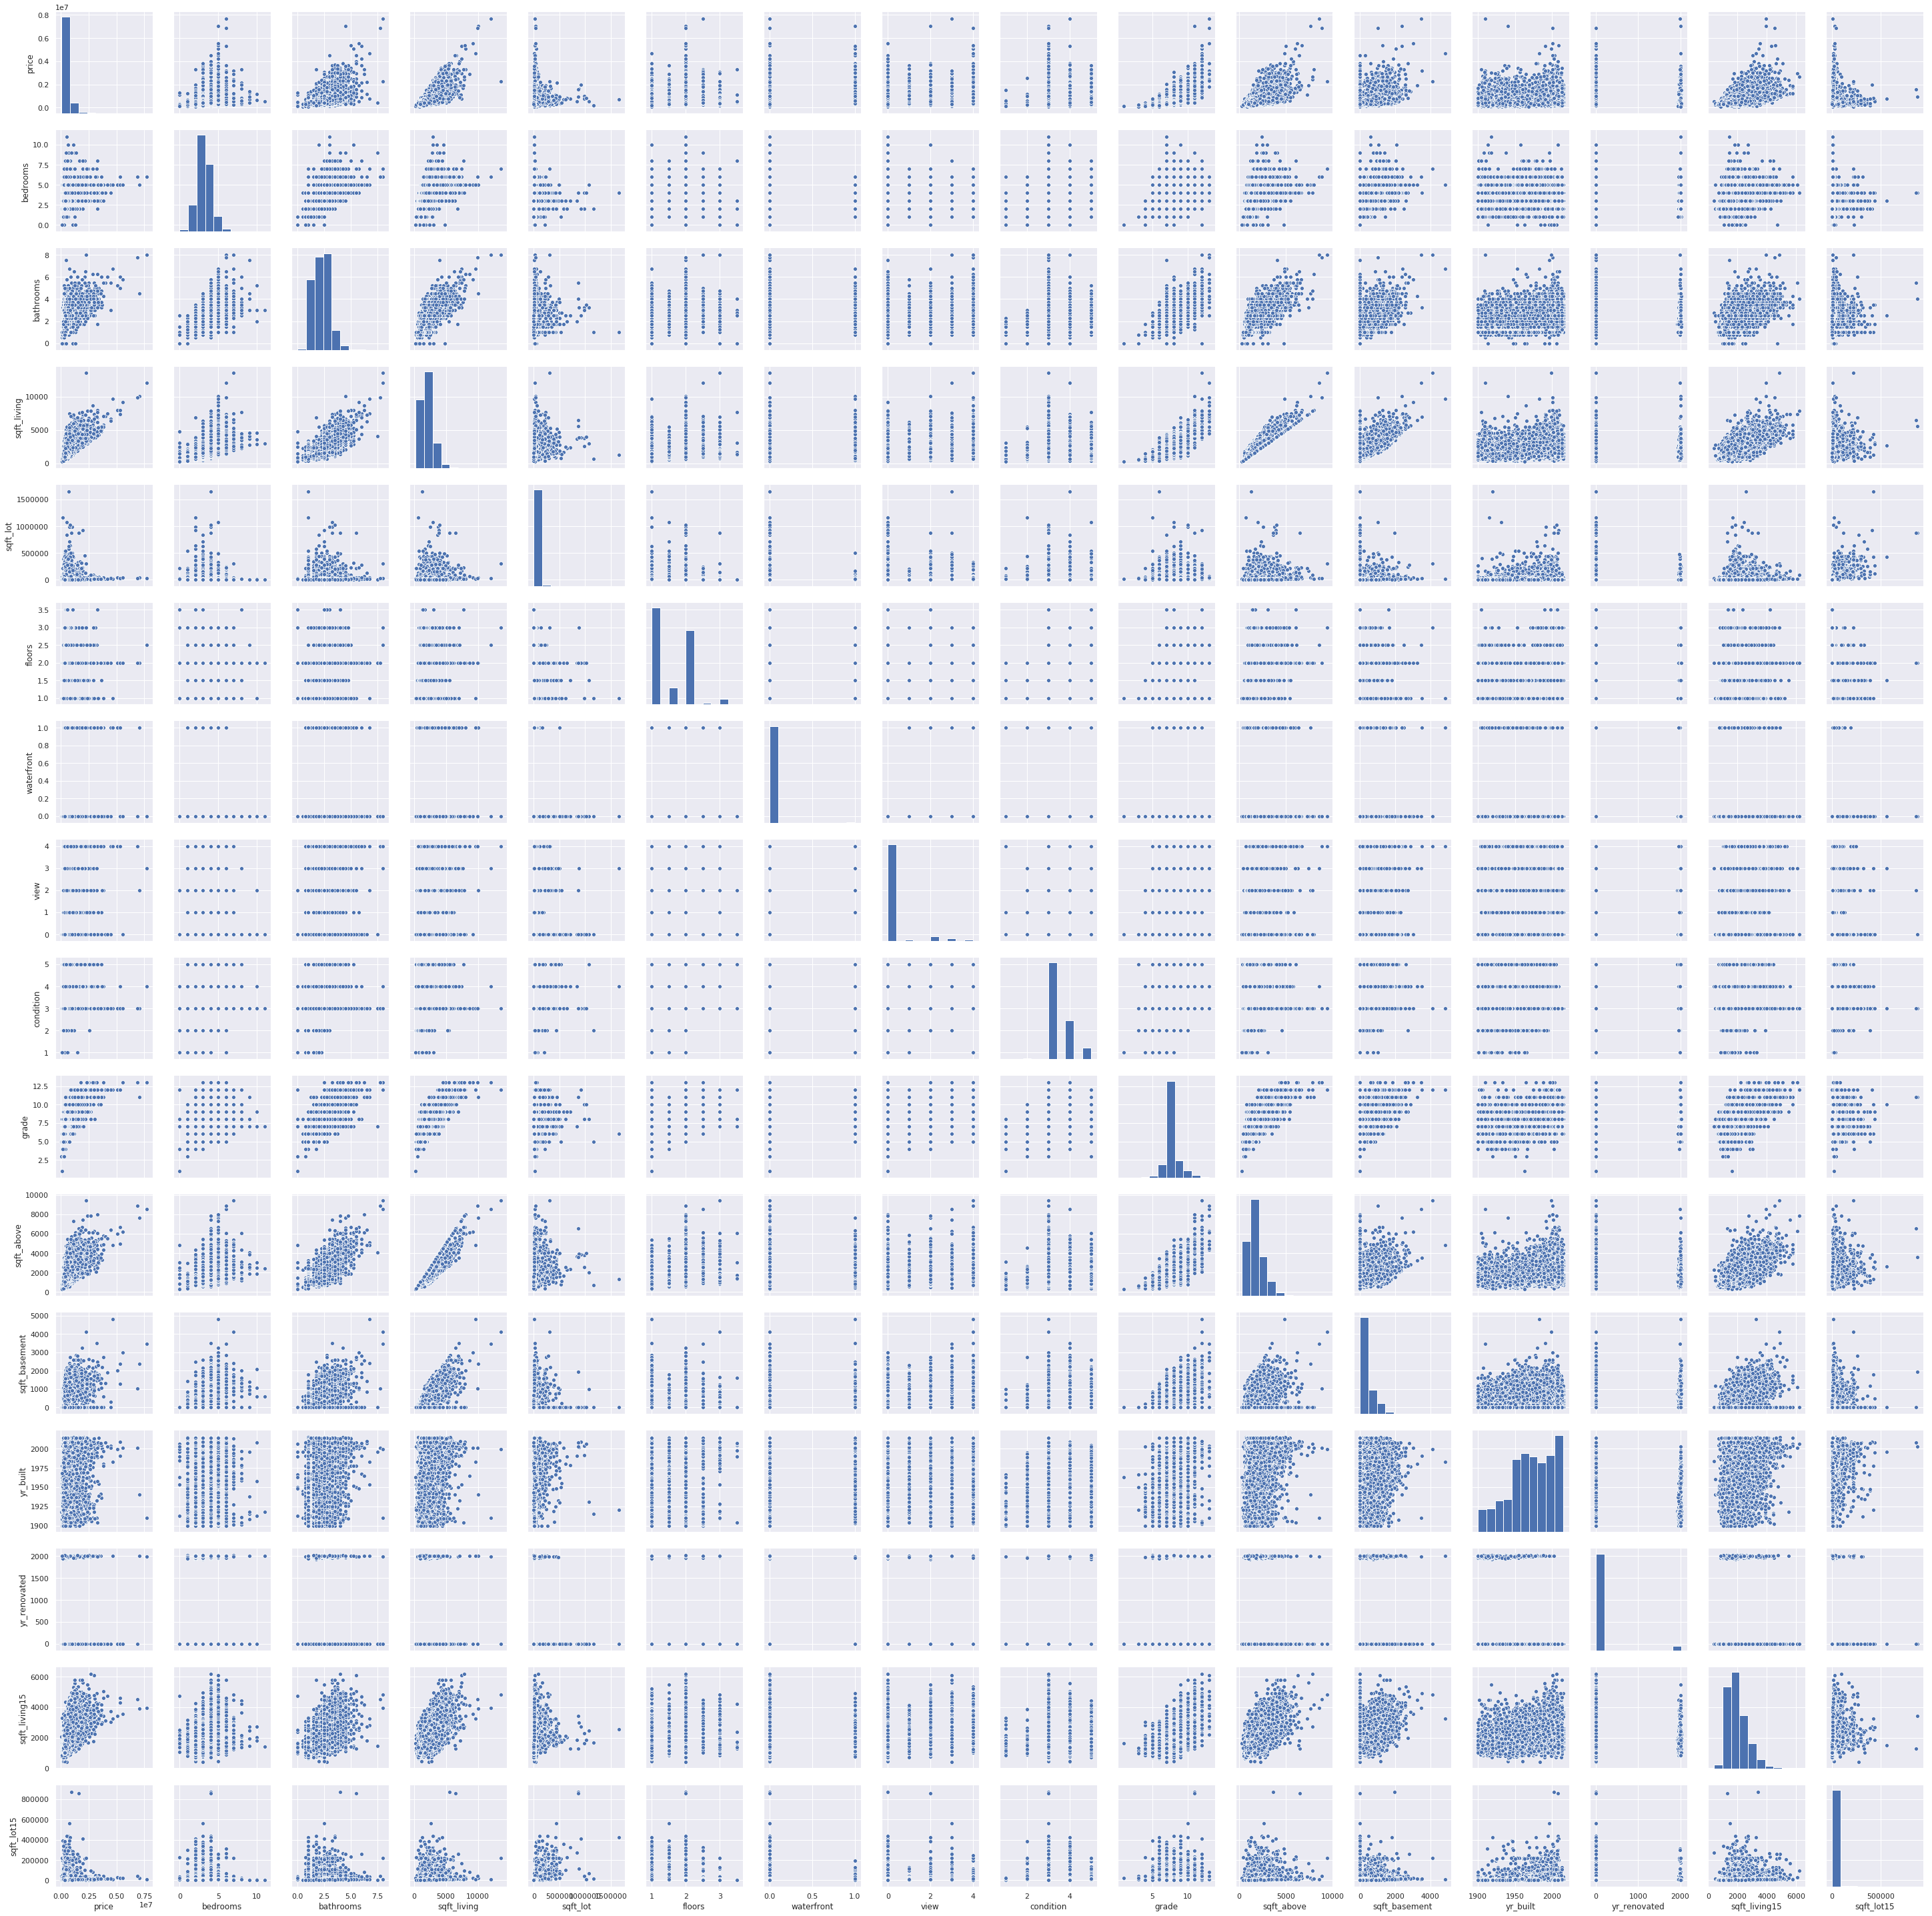

In [374]:
sns.pairplot(df.drop(['id','date','lat','long','zipcode'],axis=1));

### Corelation plot

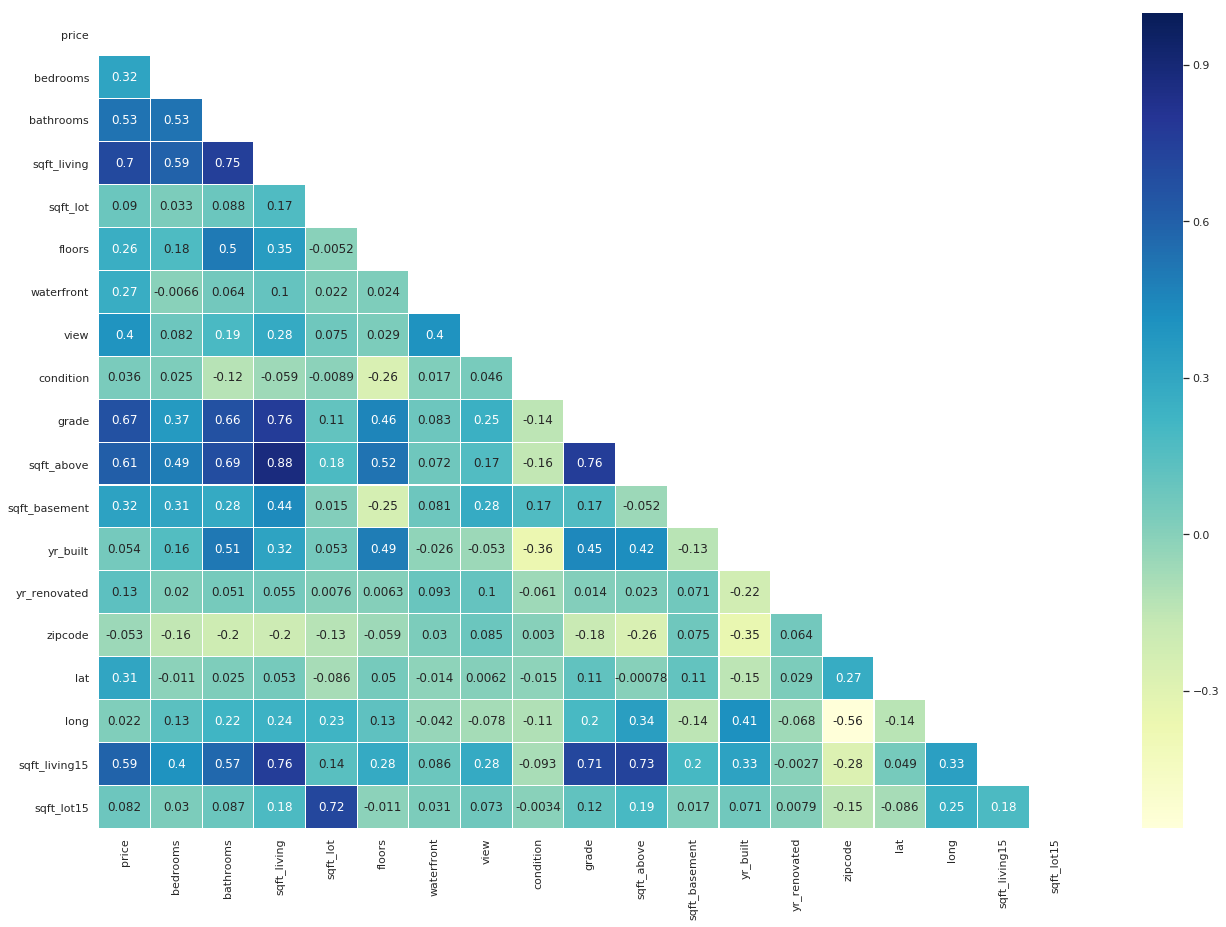

In [375]:
sns.set(rc={'figure.figsize':(22,15)})
cr = df.drop(['id','date'],axis=1).corr()
mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  sns.heatmap( cr, cmap='YlGnBu', annot=True, mask=mask, square=False, linewidth=.1);

-  Above table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

-  Variables with strongest effects on price are :

  1. sqft_living ( 0.7)
  2. grade ( 0.67)
  3. sqft_above ( 0.61)
  4. sqft_living15 ( 0.59)
  5. bathrooms ( 0.53)


### sqft_living vs Price

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


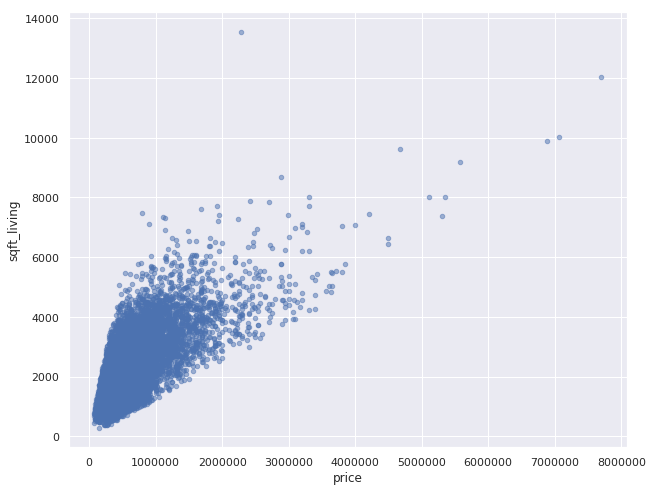

In [376]:
sns.set(rc={'figure.figsize':(10,8)})
df.plot.scatter( x='price', y='sqft_living', alpha=0.5)

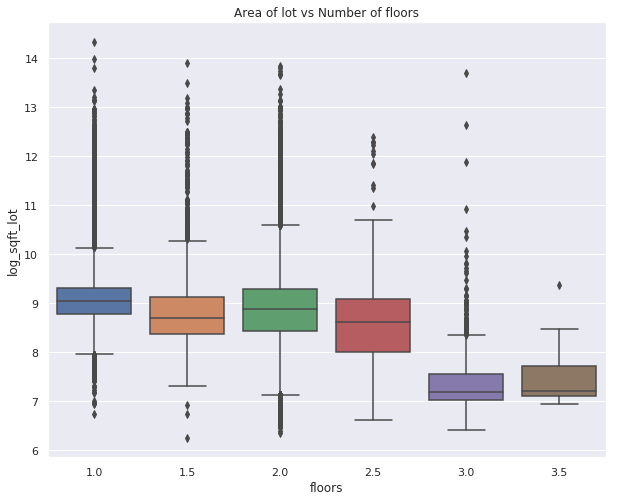

In [377]:

df['log_sqft_lot'] = np.log(df['sqft_lot'])
sns.boxplot(x="floors", y="log_sqft_lot", data=df);
plt.title('Area of lot vs Number of floors')
plt.show()